INFO [matplotlib.animation.save]: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO [matplotlib.animation._run]: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1200x700 -pix_fmt rgba -framerate 10.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpyw457qli/temp.m4v


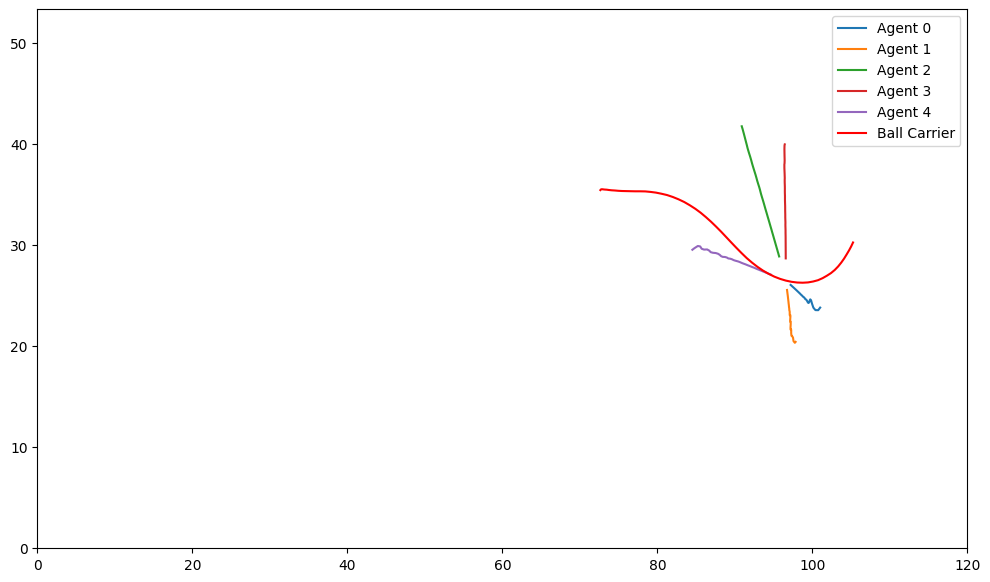

In [1]:
from src.pso.pso import PSODefense
from src.pso.objective_functions import (
    minimize_distance_to_ball_carrier_with_obstacle_avoidance
)
from src.pso.data_preprocessing import get_preprocessed_tracking_data
import numpy as np
from frechetdist import frdist


data = get_preprocessed_tracking_data(
    week_num=1, 
    game_id=2022091102, 
    play_id=2065
)

df = data['df']
ball_carrier_id = data['ball_carrier_id']
off_abbr = data['off_abbr']
def_abbr = data['def_abbr']

pso = PSODefense(
    play=df, 
    objective_function=minimize_distance_to_ball_carrier_with_obstacle_avoidance, 
    def_abbr=def_abbr, 
    off_abbr=off_abbr, 
    ball_carrier_id=ball_carrier_id,
    positional_group='secondary',
    w=.729,
    c1=1.49445,
    c2=1.49445,
    max_iterations=1_000,
    time_weighting_factor=3,
    obstacle_avoidance_factor=1.0,
    stop_threshold=0.0001

)
pso.optimize()
pso.smooth_paths()
pso.animate_play()